# Import Libriaries and Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pwd

'/Users/jiehu/Hotel Cancellations'

In [4]:
hotel = pd.read_csv('/Users/jiehu/hotel_bookings.csv')

In [5]:
hotel.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [103]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

# Data Cleansing
### <span style="color:blue"> 1. Dealing with Missing Values </span>
Use a heatmap to check if there are any missing values in our data frame

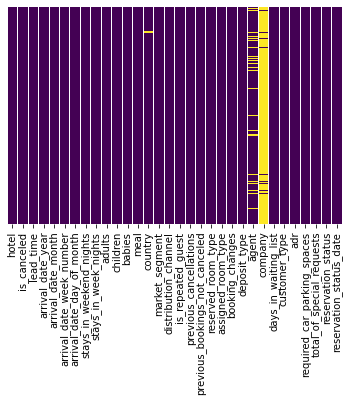

In [6]:
sns.heatmap(hotel.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There're missing values under three features:
1.['company']: Looking at the company column, it looks like we are just missing too much of that data to do something useful but just *REMOVE COLUMN*.

2.['agent']: The proportion of missing data (13.7%) is likely small enough for reasonable replacement with some form of imputation. I don't want to skew the data so decide to use the *RANDOM SAMPLING IMPUTATION* instead of MODE IMPUTATION to replace them proportionally with the existing categorical variables.

3.['country']: The missing data is very small (<5%) so I'll just *REMOVE ROWS OF MISSING VALUES*.

### 1.1 Generate random values of variable 'agent' to fill null.

In [7]:
new_agent = hotel['agent'].dropna() #get a series of just the available values
n_null = hotel['agent'].isnull().sum() #length of the missing entries

In [8]:
new_agent.sample(n_null,replace=True).values #sampel it with repetition

array([248.,   1.,   9., ..., 146., 240.,   9.])

In [9]:
hotel.loc[hotel['agent'].isnull(),'agent']

0        NaN
1        NaN
2        NaN
6        NaN
18       NaN
          ..
119124   NaN
119151   NaN
119166   NaN
119215   NaN
119248   NaN
Name: agent, Length: 16340, dtype: float64

In [10]:
hotel.loc[hotel['agent'].isnull(),'agent'] = new_agent.sample(n_null,replace=True).values

### 1.2 Remove column of 'company'

In [11]:
hotel.drop('company',axis=1,inplace=True)

### 1.3 Remove row with missing values for 'country' column.

In [12]:
hotel.dropna(axis=0,inplace=True)

In [108]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

# Exploratory Data Analysis

hotel.corr()

how many bookings and how many of them are canceled by hotel?
what's the cancellation ratio by hotel, and is it growing?

timeseries cancellations/ratio by hotel
where we see high and low?

measure impact on total revenue loss 
and, revenue loss by sales channel

look into pattern: 
    cancellations by market segment, by year;
    cancellation ratio by market segment;
    deosit policy
    special service
    room type

### How many bookings're canceled?

In [13]:
# calculate number/proportion of hotel reservations and cancellations
cancels = hotel['is_canceled'].sum()
bookings = hotel['is_canceled'].count()
print(cancels,bookings-cancels,bookings,cancels/bookings,1-cancels/bookings)

44153 74745 118898 0.3713519150868812 0.6286480849131189


In [19]:
cancels_hotel = hotel.groupby('hotel')['is_canceled'].sum()
bookings_hotel = hotel.groupby('hotel')['is_canceled'].count()
print(cancels_hotel,bookings_hotel-cancels_hotel)

hotel
City Hotel      33076
Resort Hotel    11077
Name: is_canceled, dtype: int64 hotel
City Hotel      46226
Resort Hotel    28519
Name: is_canceled, dtype: int64


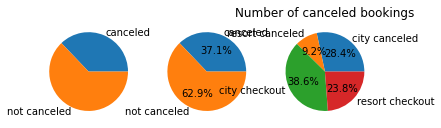

In [25]:
labels = 'canceled','not canceled'
sizes_1 = [44153,74745]
sizes_2 = [37.1,62.8]

labels_2 = 'city canceled','resort canceled','city checkout','resort checkout'
sizes_3 = [33976,11077,46226,28519]

fig,(ax1,ax2,ax3) = plt.subplots(1,3)
ax1.pie(sizes_1,labels=labels)
ax1.axis=('equal') # equal aspect ratio ensures that pie is drawn as a circle

ax2.pie(sizes_2,labels=labels,autopct='%1.1f%%')
ax1.axis=('equal')
plt.title('Proportion of canceled bookings')

ax3.pie(sizes_3,labels=labels_2,autopct='%1.1f%%')
ax3.axis=('equal')

plt.title('Number of canceled bookings')
plt.show()

*Note: Number of cancellations of city hotel is 3X greater than resort hotel.

### Reservations and Cancellations Distributed by Month

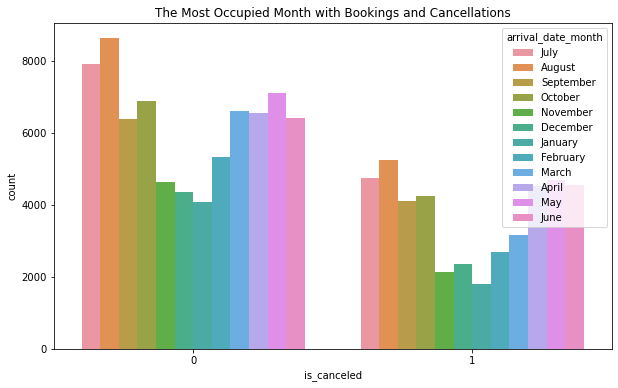

In [175]:
plt.figure(figsize=(10,6))
sns.countplot(x='is_canceled',hue='arrival_date_month',data=hotel)
plt.title('The Most Occupied Month with Bookings and Cancellations')
plt.show()

*Note: Auguest had seen most reservations and cancellations. A price check during that period will be undertaken later in the part called 'pattern'

In [ ]:
sns.lmplot(x='',y='adr',data=hotel)

### What's the cancellation rate by hotel and is it growing over years?

,is_canceled
hotel,
City Hotel,0.417089
Resort Hotel,0.279750


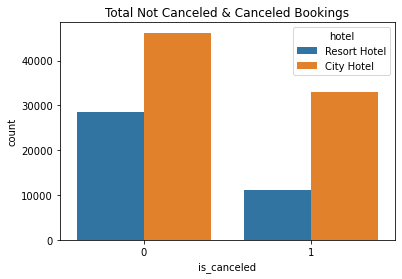

In [139]:
# plot non-canceled bookings and canceled bookings by hotel
sns.countplot(x='is_canceled',hue='hotel',data=hotel)
plt.title('Total Not Canceled & Canceled Bookings')

# calculate cancellation rate by hotel
hotel_cancels = hotel.groupby('hotel')['is_canceled'].sum()
hotel_bookings = hotel.groupby('hotel')['is_canceled'].count()
pd.DataFrame(hotel_cancels/hotel_bookings)

In [69]:
# calculate yearly hotel cancellation rate 
cancels_ = hotel.groupby(['hotel','arrival_date_year'])['is_canceled'].sum()
bookings_ = hotel.groupby(['hotel','arrival_date_year'])['is_canceled'].count()

In [28]:
print('Hotel Cancellation Rate by Year:')
pd.DataFrame(cancels_/bookings_).transpose()

Hotel Cancellation Rate by Year:


hotel             City Hotel                    Resort Hotel            \
arrival_date_year       2015      2016     2017         2015      2016   
is_canceled         0.438118  0.403907  0.42492     0.258663  0.268306   

hotel                        
arrival_date_year      2017  
is_canceled        0.308931

### Impact - revenue loss by hotel

In [27]:
# create a 'revenue' column at the end of the dataframe
total_nights = hotel['stays_in_weekend_nights'] + hotel['stays_in_week_nights']
hotel['revenue'] = hotel['adr'].multiply(total_nights,axis='index')

In [28]:
# total revenue and revenue loss
pd.DataFrame(hotel.groupby('is_canceled')['revenue'].sum()).transpose()

is_canceled,0,1
revenue,2.590896e+07,16711237.66


is_canceled            0                         1             
hotel         City Hotel Resort Hotel   City Hotel Resort Hotel
revenue      14393780.18  11515184.64  10881722.28   5829515.38

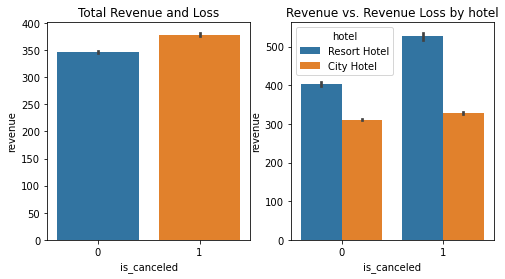

In [29]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.barplot(x='is_canceled',y='revenue',data=hotel)
plt.title('Total Revenue and Loss')

plt.subplot(1,2,2)
# total revenue and revenue loss by cancellations
sns.barplot(x='is_canceled',y='revenue',hue='hotel',data=hotel)
plt.title('Revenue vs. Revenue Loss by hotel')

pd.DataFrame(hotel.groupby(['is_canceled','hotel'])['revenue'].sum()).transpose()

In [77]:
# calculate revenue loss by year
pd.DataFrame(hotel.groupby(['is_canceled','arrival_date_year'])['revenue'].sum()).transpose()

is_canceled                 0                                    1  \
arrival_date_year        2015         2016        2017        2015   
revenue            4478107.67  11625614.84  9805242.31  2297492.15   

is_canceled                               
arrival_date_year        2016       2017  
revenue            7191892.41  7221853.1

*Note: Increased cancellations cause revenue loss enlarged over years

### Main Revenue Stream (distribution channels)

In [95]:
mkt_revenue = hotel[hotel['is_canceled']==1].groupby(['distribution_channel','hotel'])['revenue'].sum()
pd.DataFrame(mkt_revenue).sort_values(by='revenue',ascending=False)

revenue
distribution_channel hotel                    
TA/TO                City Hotel    22452994.77
                     Resort Hotel  13608142.64
Direct               Resort Hotel   3235932.05
                     City Hotel     2173765.14
Corporate            City Hotel      602745.13
                     Resort Hotel    500061.83
GDS                  City Hotel       45997.42
Undefined            Resort Hotel       563.50

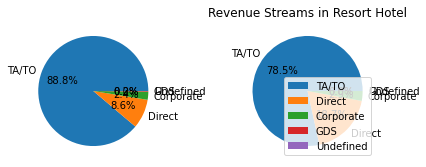

In [36]:
labels_3 = 'TA/TO','Direct','Corporate','GDS','Undefined'
sizes_4 = [22452994.77,2173765.14,602745.13,45997.42,0]
sizes_5 = [13608142.64,3235932.05,500061.83,0,563.50]

fig,(ax1,ax2) = plt.subplots(1,2)
ax1.pie(sizes_4,labels=labels_3,autopct='%1.1f%%')
ax1.axis=('equal')
plt.title('Revenue Streams in City Hotel')

ax2.pie(sizes_5,labels=labels_3,autopct='%1.1f%%')
ax2.axis=('equal')
ax2.legend(loc='lower right')
plt.title('Revenue Streams in Resort Hotel')

plt.tight_layout()
plt.show()

### Look into the cancellation patterns

### <span style='color:blue'> i. pattern in different hotel typies </span>

In [121]:
# create a column combined with arrial year and month
hotel['year_month'] = hotel['arrival_date_year'].astype(str) + '-' + hotel['arrival_date_month']
# convert year+month to datetime
pd.to_datetime(hotel[['year','month']].assign(Day=1))

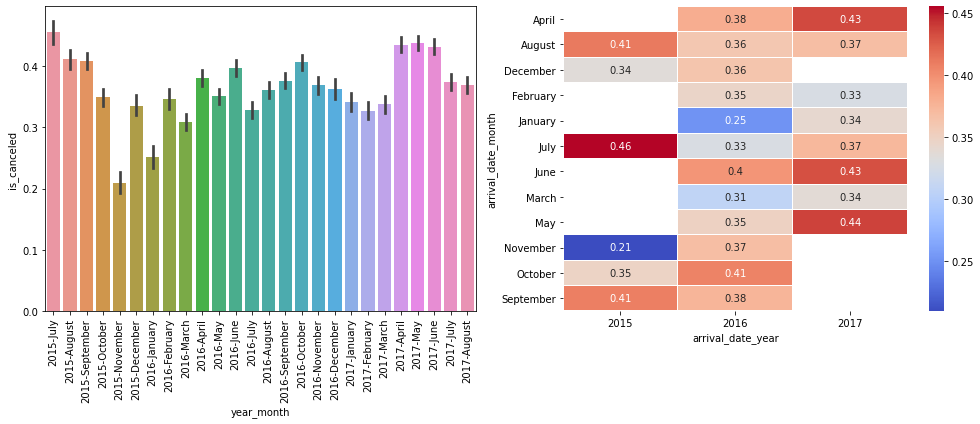

In [239]:
# timeseries cancellation
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.barplot(x='year_month',y='is_canceled',data=hotel)
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
cancel_yrmo_pivot = hotel.pivot_table(index='arrival_date_month',columns='arrival_date_year',values='is_canceled')
sns.heatmap(cancel_yrmo_pivot,cmap='coolwarm',annot=True,lw=0.05)

plt.tight_layout()
plt.show()

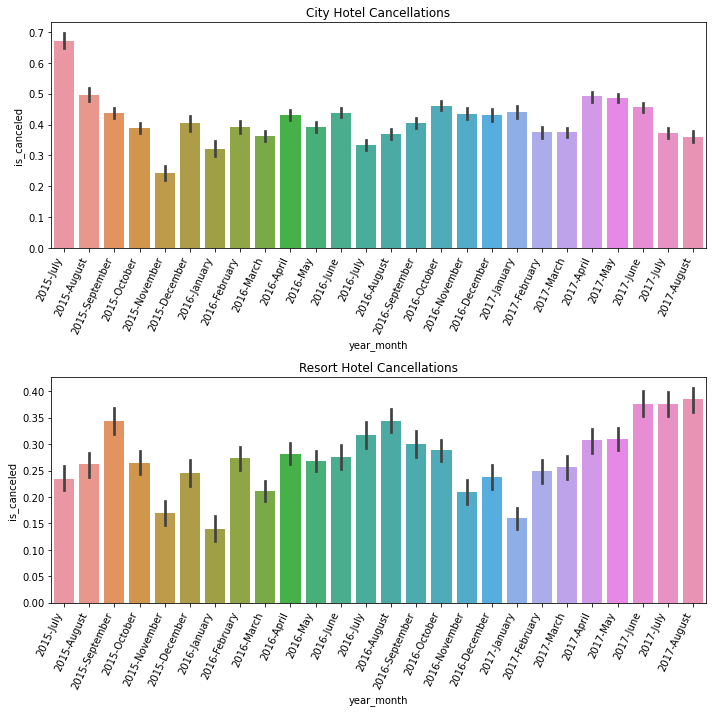

In [241]:
# timeseries cancellation by hotel
city_hotel  = hotel[hotel.hotel == 'City Hotel']
resort_hotel = hotel[hotel.hotel == 'Resort Hotel']

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.barplot(x='year_month',y='is_canceled',data=city_hotel)
plt.xticks(rotation=65,horizontalalignment='right')
plt.title('City Hotel Cancellations')

plt.subplot(2,1,2)
sns.barplot(x='year_month',y='is_canceled',data=resort_hotel)
plt.xticks(rotation=65,horizontalalignment='right')
plt.title('Resort Hotel Cancellations')

plt.tight_layout()
plt.show()

### <span style='color:blue'> ii by market segment </span>

In [228]:
# dataframe contains only canceled bookings
hotel_1 = hotel[hotel.is_canceled == 1]

In [229]:
# revenue loss by market segment
pd.DataFrame(hotel_1.groupby('market_segment').sum()['revenue'].sort_values(ascending=False))

,revenue
market_segment,
Online TA,10227110.61
Groups,2800543.98
Offline TA/TO,2483476.35
Direct,988138.66
Corporate,195120.07
Aviation,16578.00
Complementary,269.99


In [224]:
# total revenue loss
hotel[hotel.is_canceled == 1].sum()['revenue']

16711237.659999738

In [230]:
# OTA ratio of total revenue loss
10227110.61/16711237.659999738

0.6119900164234849

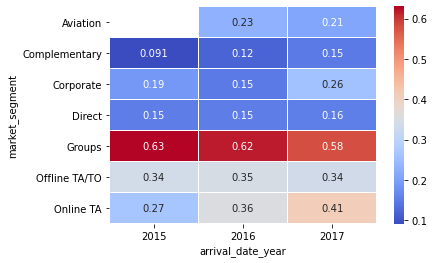

In [102]:
# What's the cancellation rate by market segment?
cancel_pivot = hotel.pivot_table(index='market_segment',columns='arrival_date_year',values='is_canceled')
sns.heatmap(cancel_pivot,cmap='coolwarm',annot=True,lw=0.05)

*Note: Groups had hightest cancellation ratio, followed by Online TA

### <span style='color:blue'> iii by deposit policy & request for service </span>

In [ ]:
bookings.groupby('')

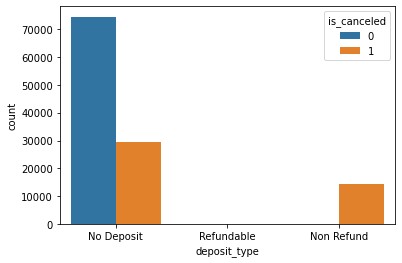

In [51]:
sns.countplot(hotel['deposit_type'],hue='is_canceled',data=hotel)

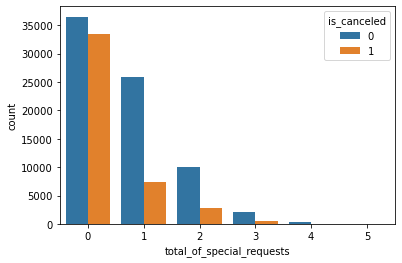

In [53]:
sns.countplot(hotel['total_of_special_requests'],hue='is_canceled',data=hotel)
plt.show()

In [60]:
hotel.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

### <span style='color:blue'> iii Compare adr of canceled vs. non-canceled bookings </span>

In [88]:
hotel[hotel['adr']==5400]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,revenue
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,Non Refund,12.0,0,Transient,5400.0,0,0,Canceled,2016-02-19,5400.0


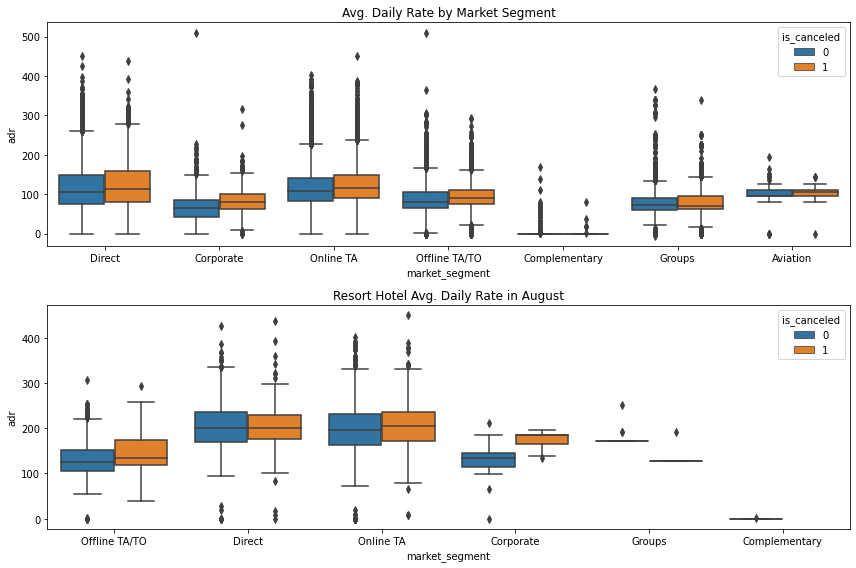

In [101]:
hotel_5400 = hotel[hotel.adr != 5400]

hotel_city = hotel[hotel.hotel == 'City Hotel']
hotel_resort = hotel[hotel.hotel == 'Resort Hotel']
hotel_resort_august = hotel_resort[hotel_resort.arrival_date_month == 'August']

plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.boxplot(x='market_segment',y='adr',data=hotel_5400,hue='is_canceled')
plt.title('Avg. Daily Rate by Market Segment')

plt.subplot(2,1,2)
sns.boxplot(x='market_segment',y='adr',data=hotel_resort_august,hue='is_canceled')
plt.title('Resort Hotel Avg. Daily Rate in August')

plt.tight_layout()
plt.show()

# Insights

In [ ]:
sgmt_loss = pd.DataFrame(hotel.groupby(['market_segment','arrival_date_month']).sum()['revenue'])
sgmt_loss.head(60)

In [204]:
hotel.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [203]:
hotel[hotel.market_segment == 'Online TA'].groupby('arrival_date_month').sum()['revenue']

arrival_date_month
April        2087938.18
August       5025553.84
December      982978.84
February     1028977.47
January       788219.73
July         4073570.60
June         2430020.65
March        1432140.13
May          2294903.09
November      816276.55
October      1384209.44
September    1577522.76
Name: revenue, dtype: float64

In [205]:
hotel[hotel.market_segment == 'Offline TA/TO'].groupby('arrival_date_month').sum()['revenue']

arrival_date_month
April         572532.24
August       1265221.32
December      341929.00
February      308025.98
January       155604.36
July         1174244.84
June         1142810.09
March         425961.04
May           708966.01
November      301520.05
October       755187.16
September     985122.15
Name: revenue, dtype: float64

In [206]:
hotel[hotel.market_segment == 'Groups'].groupby('arrival_date_month').sum()['revenue']

arrival_date_month
April        623692.53
August       269862.21
December     202509.48
February     210143.68
January      138691.99
July         277418.93
June         347796.91
March        481945.74
May          627492.37
November     221041.55
October      553500.95
September    714110.40
Name: revenue, dtype: float64

In [207]:
hotel[hotel.market_segment == 'Direct'].groupby('arrival_date_month').sum()['revenue']

arrival_date_month
April         352775.65
August       1316437.44
December      230447.08
February      207389.24
January       145678.16
July          975136.80
June          488867.02
March         219985.05
May           356374.34
November      145149.04
October       233559.80
September     365717.56
Name: revenue, dtype: float64

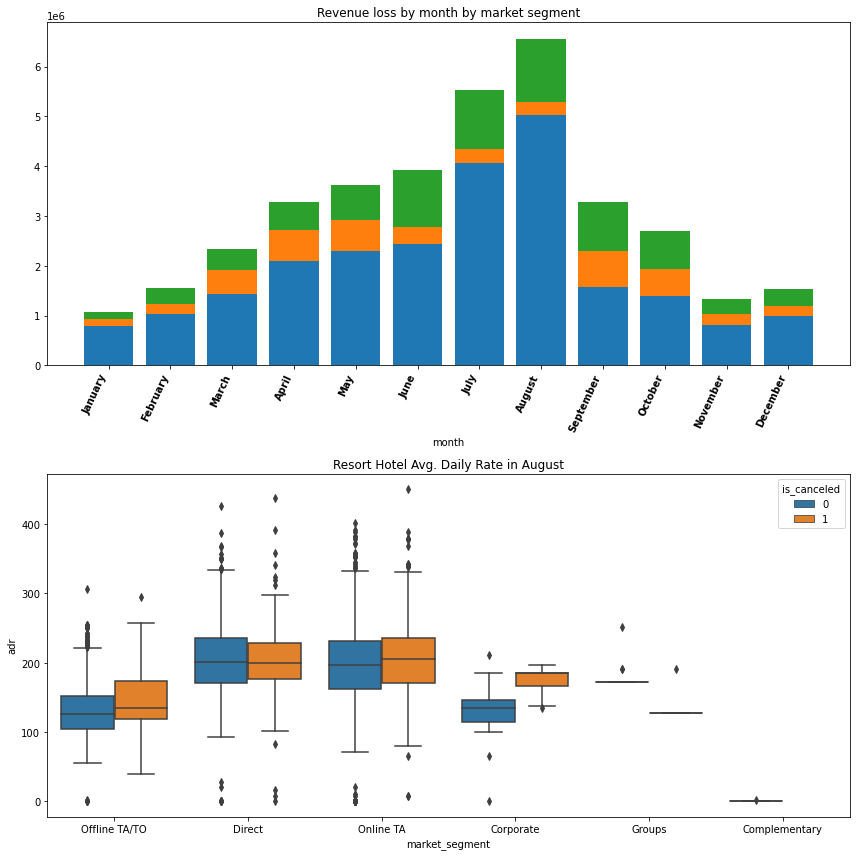

In [246]:
# 1. plot revenue loss by month
# Names of group and bar width
names = ['January','February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
barWidth = 3

# The position of the bars on the x-axis
r = [1,2,3,4,5,6,7,8,9,10,11,12]

# Values of each group
bar_1_ota = [788219.73,1028977.47,1432140.13,2087938.18,2294903.09,2430020.65,4073570.60,5025553.84,1577522.76,1384209.44,816276.55,982978.84]
bar_2_groups = [138691.99,210143.68,481945.74,623692.53,627492.37,347796.91,277418.93,269862.21,714110.40,553500.95,221041.55,202509.48]
bar_3_offta = [155604.36,308025.98,425961.04,572532.24,708966.01,1142810.09,1174244.84,1265221.32,985122.15,755187.16,301520.05,341929.00]

#height
bars12 = np.add(bar_1_ota,bar_2_groups).tolist()

# Create ota bar
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)

plt.bar(r,bar_1_ota)
plt.bar(r,bar_2_groups,bottom=bar_1_ota)
plt.bar(r,bar_3_offta,bottom=bars12)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel('month')

plt.xticks(rotation=65,horizontalalignment='right')

plt.title('Revenue loss by month by market segment')

# 2. plot adr in august
plt.subplot(2,1,2)
sns.boxplot(x='market_segment',y='adr',data=hotel_resort_august,hue='is_canceled')
plt.title('Resort Hotel Avg. Daily Rate in August')

plt.tight_layout()
plt.show()

1. August is the busiest month and also saw greatest number of hotel cancellations. Drilling down to market segment, online TA accounted for a large portion (61%) of the revenue loss.

2. Resort hotel cancellations had seen obvious seasonality. Further analysis in adr reveals that adr of canceled OTA bookings are higher than actual spent in resort hotel in summer.


In [ ]:
bar_4_direct = [145678.16,207389.24,219985.05,352775.65,356374.34,488867.02,975136.80,1316437.44,365717.56,233559.80,145149.04,230447.08]
bars123 = np.add(bar_1_ota,bar_2_groups,bar_3_offta).tolist()
plt.bar(r,bar_4_direct,bottom=bars123)


plt.bar(r,bar_ota)
plt.bar(r,bar_groups,bottom=bar_ota)
plt.bar(r,bar_offta,bottom=bar_groups)
plt.bar(r,bar_direct,bottom=bar_offta)